In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

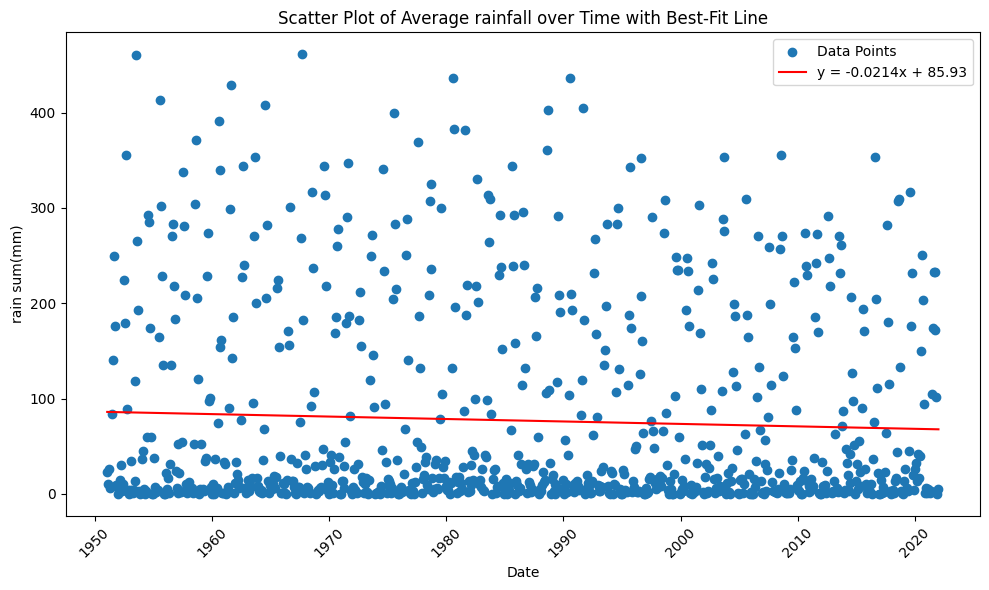

Equation of the best-fit line:
y = -0.0214x + 85.93
            average_rain
date                    
1951-01-31     22.902619
1951-02-28     10.825473
1951-03-31     25.577997
1951-04-30      5.708175
1951-05-31      6.655129
...                  ...
2021-08-31    233.159806
2021-09-30    172.023694
2021-10-31    101.384353
2021-11-30      0.114377
2021-12-31      5.445273

[852 rows x 1 columns]


In [2]:
tmax = pd.read_csv('daily_avg_rainfall_up_1951_to_2023.csv', parse_dates=['date'], index_col='date')
tmax = tmax['1951-01-01':'2023-12-31']
avg_year = tmax.resample('ME').sum()
avg_year = avg_year['1951-01-01':'2021-12-31']

# Calculate the best-fit line
x = np.arange(len(avg_year))
y = avg_year['average_rain'].values

coefficients = np.polyfit(x, y, 1)  # Fit a linear polynomial (degree 1)
slope = coefficients[0]
intercept = coefficients[1]

# Generate the line equation
line_equation = f'y = {slope:.4f}x + {intercept:.2f}'

# Plot the data and best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(avg_year.index, avg_year['average_rain'], label='Data Points')

# Plot the best-fit line
plt.plot(avg_year.index, slope * x + intercept, color='red', label=line_equation)

plt.xlabel('Date')
plt.ylabel('rain sum(mm)')
plt.title('Scatter Plot of Average rainfall over Time with Best-Fit Line')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best-fit line:\n{line_equation}")
print(avg_year)